In [37]:
import numpy as np
def u_func(c,l,v,e):
    return np.log(c) - v*(l**(1+1/e))/(1+(1/e))

In [1]:
john = 1

In [63]:
def u_find_best_choice(m,v,e,kappa,tau1,tau0,w,x,N1,N2,do_print=True):
    
    shape_tuple = (N1,N2)
    c_values = np.empty(shape_tuple)
    l_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of c=l=0
    c_best = 0
    l_best = 0
    u_best = u_func(0,0,v,e)
    
    # c. loop through all possibilities
    for i in range(N1):
        for j in range(N2):
            
            # i. x1 and x2 (chained assignment)
            c_values[i,j] = c = (x/N1)
            l_values[i,j] = l = (1/(N2))

            if m + w * l - (tau0 * w * l + tau1 * np.fmax(w * l - kappa, 0)) <= x: 
                u_values[i,j] = u_func(c,l,e,v)
            else: # u(0,0) if expenditures > income
                u_values[i,j] = u_func(0,0,e,v)
            
            # iii. check if best sofar, updating the "best-values", if the combination of consumption of x1 and x2 differs from the original consumption combination. 
            if u_values[i,j] > u_best:
                c_best = c_values[i,j]
                l_best = l_values[i,j] 
                u_best = u_values[i,j]            
           
    # d. print
    if do_print:
        print_solution(c_best,l_best,u_best,w,x)

    return c_best,l_best,u_best,c_values,l_values,u_values

# function for printing the solution
def print_solution(c,l,u,w,x):
    print(f'c = {c:.8f}')
    print(f'l = {l:.8f}')
    print(f'u  = {u:.8f}')
    print(f'c-x = {c-x:.8f}') 


    
    
        

In [64]:
sol = u_find_best_choice(m=1,v=10,e=0.3,kappa=0.4,tau1=0.1,tau0=0.4,x=100,w=1,N1=500,N2=400)
print(sol)

C:\Users\estoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


c = 0.20000000
l = 0.00250000
u  = -1.60981242
c-x = -99.80000000
(0.2, 0.0025, -1.6098124217102274, array([[0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       ...,
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2]]), array([[0.0025, 0.0025, 0.0025, ..., 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, ..., 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, ..., 0.0025, 0.0025, 0.0025],
       ...,
       [0.0025, 0.0025, 0.0025, ..., 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, ..., 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, ..., 0.0025, 0.0025, 0.0025]]), array([[-1.60981242, -1.60981242, -1.60981242, ..., -1.60981242,
        -1.60981242, -1.60981242],
       [-1.60981242, -1.60981242, -1.60981242, ..., -1.60981242,
        -1.60981242, -1.60981242],
       [-1.60981242, -1.60981242, -

In [96]:
money=1 #m
v=10 #v
frisch=0.3 #epsilon
ltax=0.4 #tau_0
ttax=0.1 #tau_1
cutoff=0.4 #kappa
w=0.5

In [97]:
def laboursupply(l,c,frisch,v):
    #Returning utility from labour supply and consumption
    u=np.log(c)-v*l**(1+1/frisch)/(1+1/frisch)
    return (u)

def budget_constraint(money,w,l,ltax,ttax,cutoff):
    #Returning total resources in terms of wage less taxes and cash
    budget=money+w*l-w*l*ltax-ttax*max((w*l-cutoff),0)
    return budget

In [99]:
from scipy import optimize

#Objective function returning negative utility, to minimize
def value_of_choice(l,w,frisch,v,ltax,ttax,cutoff):
    c=budget_constraint(money,w,l,ltax,ttax,cutoff)
    return -laboursupply(l,c,frisch,v)

def optimiser(w,frisch,v,ltax,ttax,cutoff,money):
    #Call the solver
    sol_case1 = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(w,frisch,v,ltax,ttax,cutoff))

    #Return optimal labour supply and consumption
    lstar = sol_case1.x
    cstar = budget_constraint(money,w,lstar,ltax,ttax,cutoff)
    ustar = laboursupply(lstar,cstar,frisch,v)
    return [lstar,cstar,ustar]

def printsolution(w,frisch,v,ltax,ttax,cutoff,money):
    print(f'Optimal labour supply is: {lstar:.3f}')
    print(f'Optimal consumption is: {cstar:.3f}')
    print(f'yielding a utility of: {ustar:.3f}')


NameError: name 'x' is not defined

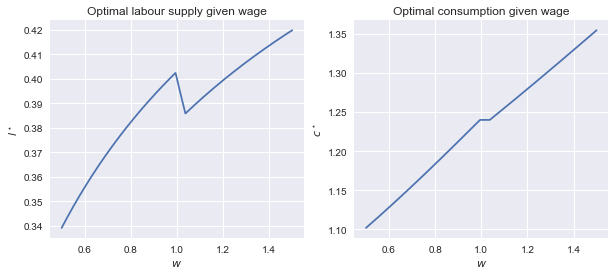

In [76]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

N=1000
w_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    bundle=optimiser(w,frisch,v,ltax,ttax,cutoff,money)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

# a. create a figure
fig = plt.figure(figsize=(10,4))

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_vec)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)